In [1]:
from IPython.display import HTML, SVG
import matplotlib
print(matplotlib.__version__)
print(matplotlib.matplotlib_fname())
from matplotlib import animation
print(animation.writers.list())
matplotlib.use('svg')

2.1.0
C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\matplotlib\mpl-data\matplotlibrc
['ffmpeg', 'ffmpeg_file', 'html']


In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


In [2]:
%matplotlib

Using matplotlib backend: svg


In [29]:
from io import BytesIO
def pltsvg(show=True):
    imgdata = BytesIO()
    plt.savefig(imgdata)
    data = imgdata.getvalue()
    if show:
        display(SVG(data=data))
    return data


import xml.etree.ElementTree as ET
def extract_gid(some_xml, gid):
    tree, xmlid = ET.XMLID(some_xml)
    return xmlid[gid]

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.sans-serif'] = 'Arial'
import numpy

In [42]:
plt.close('all')

In [52]:
fig = plt.figure()
x = numpy.linspace(0,10)
phase = 0.1
y = numpy.sin(x+phase)
line, = plt.plot(x,y)
gid = 'myline'
line.set_gid('myline')
print(gid)
imgdata=pltsvg(show=False)
plt.close()

myline


In [51]:
print(len(imgdata))
myline = extract_gid(imgdata, 'myline')
mypath = myline.getchildren()[0]
pathd = mypath.get('d')
print(len(pathd))

9697
1213


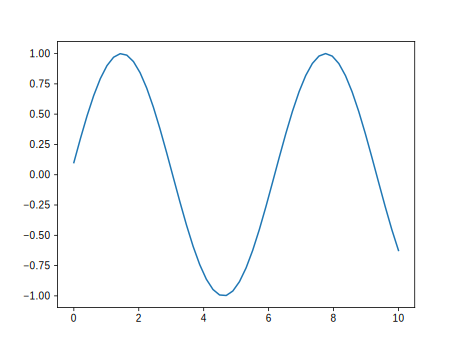

In [53]:
SVG(imgdata)

In [62]:
HTML("""
<button id="thenoid">Click me</button>
<script type="application/json" id="myline-data-0">
{}
</script>
<script>
$("#thenoid").click(function(){{
var pathd0 = $("#myline-data-0").text();
$("#myline").children().first().attr('d',pathd0)
}});
</script>
""".format(pathd))

In [4]:
fig = plt.figure()
x = numpy.linspace(0,10)
phase = 0
y = numpy.sin(x+phase)
line, = plt.plot(x,y)

def init_func():
    plt.title('n = 0')
    line.set_xdata(x)
    line.set_ydata(y)
    plt.draw()
    return line,

def update(frame):
    plt.title('n = {}'.format(frame))
    phase = frame * 0.1
    y = numpy.sin(x+phase)
    line.set_ydata(y)
    plt.draw()
    return line,
    
ani = animation.FuncAnimation(fig, update, range(0,11), init_func)
ani_html = ani.to_html5_video()
ani_js = ani.to_jshtml()
plt.show()

In [5]:
print(len(ani_html))
HTML(ani_html)

27082


In [6]:
print(len(ani_js))
HTML(ani_js)

414253


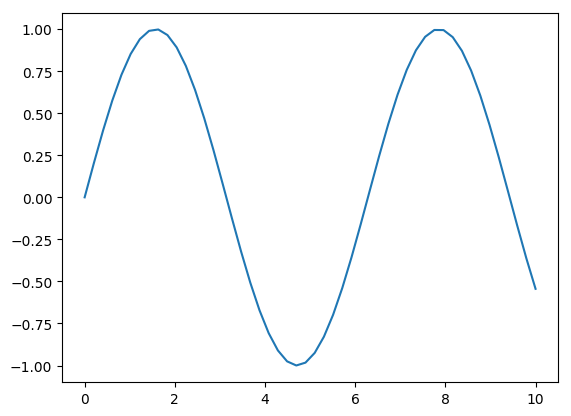

In [17]:
fig

In [8]:
plt.show()